# K nearest neighbours

## Learning objectives
- Implement the K nearest neighbour classification algorithm from scratch
- Understand the difference between parametric and non-parametric models

## Intro - the algorithm

K-nearest neighbours is an extremely simple algorithm. 
Simply predict the label for any input to be the average of the K-nearest neighbours.
K is a hyperparameter which is the number of neighbours of which the labels will be averaged between to make a prediction for a given point in feature space.

### What does it mean to be the nearest neighbour?

# diagram of vector distances for a particular example, and point out it's classification

## What is the model here?

Interestingly, the model is completely defined by the data. There are no model parameters. We call the predictor a non-parametric model in this case. All of the previous models that we have seen have been parametric. The model doesn't need to be fit. We call this kind of model a "lazy predictor".

Let's implement it.

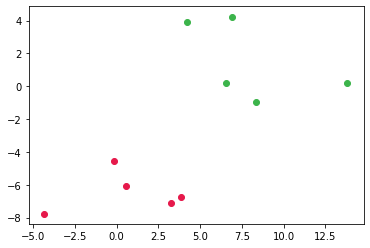

In [1]:
import pandas as pd
import sklearn.datasets
import numpy as np
np.set_printoptions(suppress=True)
from utils import get_classification_data, show_data

X, Y = get_classification_data()
show_data(X, Y)


Firstly, let's find the distances between each datapoint in feature space.

For each datapoint we need to calculate it's distance from each other datapoint.
We'll then order these distances and find the k examples which are nearest.

### What distance measure shall we use?
# diagram of different distance measures

We normally use the Euclidian distance, but we may choose to run the algorithm using different distance metrics.
The distance metric used is a hyperparameter of the algorithm.

In [4]:
def compute_distances(input_X, dataset_X):
    """Takes in an array of inputs and finds each of their distances from every example in a dataset"""
    l = len(input_X)
    m = len(dataset_X)
    distances = np.zeros((l, m))
    for i in range(l):
        this_x = input_X[i]
        for j in range(m):
            another_x = dataset_X[j]
            distance = np.linalg.norm(this_x - another_x)
            # print(distance)
            distances[i][j] = distance
    return distances

distances = compute_distances(X, X)
print(distances)
print(distances.shape)

[[ 0.          3.3197299   8.64046674  5.17698218 10.63254146  9.2917395
  14.65045988 12.09368272  2.87522639  1.68553809]
 [ 3.3197299   0.          7.42223588  8.21366643 10.64707646  7.32548425
  12.16075724 11.38181642  0.69016609  4.54212435]
 [ 8.64046674  7.42223588  0.         13.45031322  4.38190238  2.11167201
   7.26098886  4.06260825  7.99846672  8.20185659]
 [ 5.17698218  8.21366643 13.45031322  0.         14.46869307 14.36253987
  19.80283739 16.42690374  7.60267667  5.25107056]
 [10.63254146 10.64707646  4.38190238 14.46869307  0.          6.34668572
  10.24418138  2.69770081 11.06643757  9.53779902]
 [ 9.2917395   7.32548425  2.11167201 14.36253987  6.34668572  0.
   5.60006015  5.35949625  7.98339404  9.21890418]
 [14.65045988 12.16075724  7.26098886 19.80283739 10.24418138  5.60006015
   0.          7.95663822 12.8507871  14.75606502]
 [12.09368272 11.38181642  4.06260825 16.42690374  2.69770081  5.35949625
   7.95663822  0.         11.91504669 11.27599676]
 [ 2.8752

Now let's find the K-nearest neighbours for each datapoint

# image of data with radial distances from a particular example drawn, showing that the k nearest lie within the k circles of least radius

# image to show a different number of k and the predictions made as a result

Note that K should always be an odd number.
Why?
This is because the discrete classification is the mode of the labels for the K-nearest neighbours, and ties need to be broken if there are an equal number of votes for 2 classes.


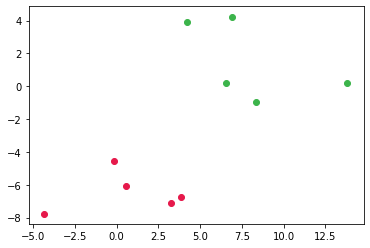

[0. 0. 1. 0. 1. 1. 1. 1. 0. 0.]
[0 0 1 0 1 1 1 1 0 0]


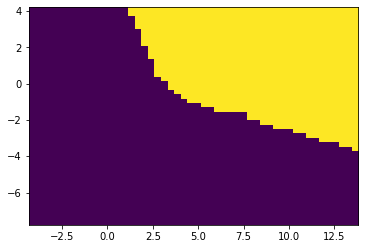

In [14]:
from get_colors import colors
from utils import visualise_predictions

class KNN:
    def __init__(self, X, Y, k=3):
        self.k = k
        self.X = X # we have to store the whole dataset in the model!
        self.Y = Y

    def predict(self, input_X):
        # print(input_X.shape)
        distances = compute_distances(input_X, self.X)
        predictions = np.zeros(len(input_X)) # initialise empty array of predictions
        min_indices = np.argsort(distances, axis=1) # compute array of indices of closest neighbours for each example
        # print(min_indices)
        all_k_nearest_indices = min_indices[:, 1:self.k+1] # get the indices of the k nearest neighbours for each example
        for idx, x in enumerate(input_X):
            k_nearest_indices = all_k_nearest_indices[idx]
            k_nearest = self.X[k_nearest_indices]
            for neighbour in k_nearest:
                diff = x - neighbour
                # print(diff)
                # plt.plot(np.array([x[0], neighbour[0]]) ,np.array([x[1], neighbour[1]]), c=colors[idx], linestyle='dotted')
            k_nearest_labels = self.Y[k_nearest_indices]
            prediction = np.mean(k_nearest_labels)
            prediction = prediction.astype(int)
            predictions[idx] = prediction
        return predictions

    def predict_vis(self, X):
        X = X[0].reshape(1, -1)
        return self.predict(X)

show_data(X, Y)

knn = KNN(X, Y, k=3)

predictions = knn.predict(X)
print(predictions)
print(Y)
# show_data(X, predictions)
visualise_predictions(knn.predict_vis, X)

## Other methods of voting
### Distance weigted voting
Perhaps we should let examples in our training dataset that are more similar to the example which we want to make a prediction for influence the prediction more. And similarly let far away examples, that may still be within the K nearest neighbours boundary influence the prediction less.
This is called **distance weighted voting**.
A way to implement this would be to weight each example inversely proportionally to the proportion of the labels in the neighbourhood that have that same class label.

Let's implement this.

In [ ]:
# implement weighted voting

## What's the best value for K?

The best K depends on your data.
There is no best K.

Let's test a bunch of different Ks.
This would be an example of hyparameter search.

In [ ]:
for k in range(10):
    predictions = predict(X, k=k)
    

## Limitations of K-nearest neighbours

- We need to find the distance between each point and every other point. The time complexity of the algorithm is dominated by this process, which scales with $O(n^2)$.
- examples that might be close in feature space, may not necessarily be close in label space. 
    - E.g. if examples have similar feature values for features that do not influence the output label, they will be close in feature space, but not in label space. 
    - proximity assumption
- when working with high dimensional data, it will not be easy to visualise the data and hand pick a suitable k.
- when making predictions, we need to store the whole dataset in the model. This can make memory a bottleneck.
- for the best results we should always scale our features to prevent any one with large values disproportionately influencing the prediction. But with KNN this can affect the distances between each example along each dimension of the feature space, resulting in different nearest neighbours. Try with and without feature scaling.
    

## SkLearn implementation

[K-nearest neighbour docs](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

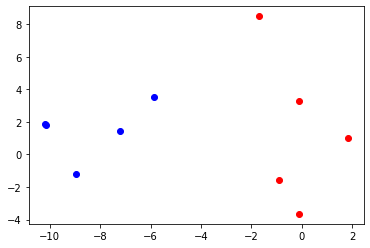

In [61]:
import sklearn.neighbors
k = 3
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)
knn.fit(X, Y)
predictions = knn.predict(X)
show_predictions(X, predictions)

## K-nearest neighbours for regression

K-nearest neighbours can also perform regression as well as classification.

The only difference is that the predictions are not rounded to represent classification labels.


## Summary
- The K-nearest neighbours algorithm makes predictions by averaging the labels of the K-nearest neighours in feature space.
- K is the number of neighbours which the algorithm will average the labels of. It is a hyperparameter.